# Lab 04 Functions and Visualization

<i>Elements of Data Science</i><br><br>
Welcome to lab 4!
This week, we will focus on functions and visualization. <br>
Visualizations is covered in [Chapter 7](https://inferentialthinking.com/chapters/07/Visualization.html) of the Inferential Thinking text. <br>
Functions are described in [Chapter 8](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html).
<br>**<center>Learning Goals**
|Area|Concept|
|---|---|
|Tables|Load and analyze data sets.|
|Visualization|Basic line, scatter, and histogram plots|
|Functions|Learn to define your own functions and apply them to arrays and Table columns|

In [1]:
# Enter your name as a string
name = ...

In [3]:
# These lines load the tests/checks and commonly used modules
# THIS TAKES A MINUTE...

import glob
import json
import numpy as np
import os
from datascience import *  # Brings into Python the datascience Table object
import matplotlib.pyplot as plt # Loads plotting module
import matplotlib.dates as mdates # Module to handle dates on plots
from matplotlib import ticker # Module for customizing axis tick marks
plt.style.use('ggplot')
%matplotlib inline

from gofer.ok import check

notebook = os.path.basename(globals()['__session__'])
notebooks = glob.glob('*.ipynb')
notebook = max(notebooks, key=os.path.getmtime)

user = os.getenv('JUPYTERHUB_USER') # Get username

## Part 1: A quick review of tables
### Creating a data table
We will begin by creating a simple data table. Most of the time, we will read the data from a file, but for this demonstration table we will create it from scratch using the `with_columns` method. Recall that a table is comprised of columns. Each column had a label (the column header) and an an associated array of data (string or numeric) and that all of the columns must be the same length.

In [4]:
# Define the data
animal_data = Table().with_columns(
    "Animal", ["Elephant", "Giraffe", "Lion", "Tiger", "Zebra"],
    "Weight (kg)", [6000, 1600, 200, 300, 350],
    "Height (cm)", [300, 550, 120, 100, 140],
    "Lifespan (years)", [70, 25, 15, 20, 25]
)
animal_data

Animal,Weight (kg),Height (cm),Lifespan (years)
Elephant,6000,300,70
Giraffe,1600,550,25
Lion,200,120,15
Tiger,300,100,20
Zebra,350,140,25


### Some common table methods

|Method|Example|Result|
|-|-|-|
|show()|show(3)| Display the first 3 rows of a table|
|drop()|drop["Height (cm)"| Returns a new table without the "Height (cm)" column|
|select()|select(["Animal", "Weight(kg)"])| Returns a new table with just the two columns specified|
|column()|column("Lifespan (years)")| Returns that data array from the specified column|

All of these methods and more can be found in the [online data tables reference](https://www.data8.org/datascience/tables.html).

A common point of confusion is `select` versus `column.`

In [5]:
# Returns a table of the one or more selected columns
animal_data.select("Lifespan (years)")

Lifespan (years)
70
25
15
20
25


In [6]:
# Returns the data array from the specified column
animal_data.column("Lifespan (years)")

array([70, 25, 15, 20, 25])

<font color=blue> **Question 1. Extracting an array from a table** </font><br />
Extract the array of animal weights from the data table.

In [7]:
weights = ...
weights

Ellipsis

In [8]:
check('tests/q1.py')

We often extract data a data column when we want to calculate some value from the data. For example, if we wanted to know the maximum weight.

In [9]:
max(weights)

TypeError: 'ellipsis' object is not iterable

We often want to calculate basic statistics on data table, so there is a method for this. 

In [10]:
animal_data.stats()

statistic,Animal,Weight (kg),Height (cm),Lifespan (years)
min,Elephant,200,100,15
max,Zebra,6000,550,70
median,,350,140,25
sum,,8450,1210,155


The `stats()` method gives us the minimum, maximum, median, and sum for each column. For the column containing string data (animal names) the min and max and the first and last entries alphabetically, respectively. The median and sum have no meaning for string data, so they are blank.

There are also method for finding the number of rows and columns in a table. These come in handy for large data tables.

In [11]:
animal_data.num_rows

5

In [12]:
animal_data.num_columns

4

Do you remember how to sort the table? Let's sort by Lifespan.

In [13]:
animal_data.sort("Lifespan (years)")

Animal,Weight (kg),Height (cm),Lifespan (years)
Lion,200,120,15
Tiger,300,100,20
Giraffe,1600,550,25
Zebra,350,140,25
Elephant,6000,300,70


<font color=blue> **Question 2. Sort Descending** </font><br />
Sort the data by weight, but in ascending order from lightest to heaviest.<br>
*Hint*: You need the `descending=False` option in your sort method.

In [14]:
animal_data_heavy_to_light = ...

In [15]:
check('tests/q2.py')

### Filtering a table
Selecting just the rows of a table that match one or more conditions is a common task. Use the `where()` method in conjuction with the appropriage `predicate.`

Here are some of the possible arguments for the <i>where</i> Table method:<br>

|Predicate|Example|Result|
|-|-|-|
|`are.equal_to`|`are.equal_to(50)`|Find rows with values equal to 50|
|`are.not_equal_to`|`are.not_equal_to(50)`|Find rows with values not equal to 50|
|`are.above`|`are.above(50)`|Find rows with values above (and not equal to) 50|
|`are.above_or_equal_to`|`are.above_or_equal_to(50)`|Find rows with values above 50 or equal to 50|
|`are.below`|`are.below(50)`|Find rows with values below 50|
|`are.between`|`are.between(2, 10)`|Find rows with values above or equal to 2 and below 10|

For example, to return just the rows that have animals taller than 200 cm. We specify the column to filter on and the condition. We get back a new table with just the rows that match the condition.

In [16]:
animal_data.where("Height (cm)", are.above(200))

Animal,Weight (kg),Height (cm),Lifespan (years)
Elephant,6000,300,70
Giraffe,1600,550,25


**What if we have more than one condition?** For example, if we want animals with height greater than 200 cm and weight less than 5000 kg? We can do this in two steps, creating in intermediate table.

In [17]:
tall_animals = animal_data.where("Height (cm)", are.above(200))
tall_not_heavy = tall_animals.where("Weight (kg)", are.below(5000))
tall_not_heavy

Animal,Weight (kg),Height (cm),Lifespan (years)
Giraffe,1600,550,25


Or we can "chain" the where commands together. The code below is equivalent, to the code above, but without creating the intermediate table. The where commands are executes sequentially from left to right.

In [18]:
animal_data.where("Height (cm)", are.above(200)).where("Weight (kg)", are.below(5000))

Animal,Weight (kg),Height (cm),Lifespan (years)
Giraffe,1600,550,25


Should you filter in steps or chain? Coding is steps is *always* easier to debug because you can inspect the results along the way. Once all of the steps are working, you can optionally rewrite the code as single chained statement for brevity if you wish.

<font color=blue> **Question 3. Filtering Practice** </font><br />
Filter `animal_data` to return a table with just the rows for animals less than 1000 kg that with a life expectancy greater than or equal to 20 years. Add as many lines of code as you wish.

In [19]:

light_but_long_lived = ...

In [20]:
check('tests/q3.py')

## Part 2: Plotting Data

We often want to visualize our data, particularly when we have a data table with a large number of points. There are many data visualization packages available for Python, but in this course we will mainly stick with one of the oldest and best know: `matplotlib.` If you look back at the start of the lab where we import the module you will see a the line:

import matplotlib.pyplot as plt

We aliased the library as plt so that instead of typing `matplotlib.pyplot` can access the plotting commands with just the `plt.` prefix. 

The plotting commands in matplotlib expect array or lists of data, not tables so we have to extract the data arrays from the tables to make our plot. For example, let's make a scatter plot of animal height vs weight.

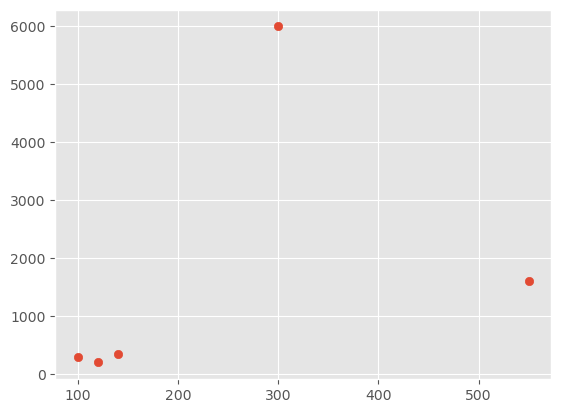

In [21]:
# Extract the data arrays
height = animal_data.column("Height (cm)")
weight = animal_data.column("Weight (kg)")

# Make the plot
plt.scatter(height, weight)

By default, matplotlib scales the axes to match the data ranges, and choose the symbol can color for you. All of this can be customized, and you can add axes labels, a graph title, and much more.

Text(0.5, 1.0, 'Animal Weight vs. Height')

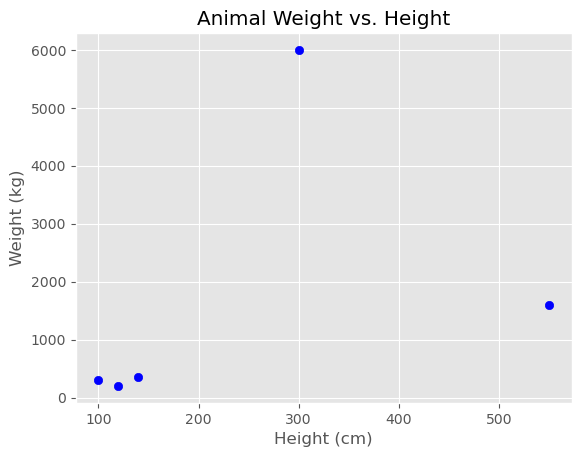

In [22]:
# Extract the data arrays
height = animal_data.column("Height (cm)")
weight = animal_data.column("Weight (kg)")

# Change the color of the points
plt.scatter(height, weight, color="blue") 

# Label the axes
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")

# Add a title
plt.title("Animal Weight vs. Height")

Scatter plots are not the only option. You can make a line plot, which connects the points. Line plots are useful for data showing a trend, but here connecting the points doesn't make much sense.

Text(0.5, 1.0, 'Connecting the dots makes no sense in this case')

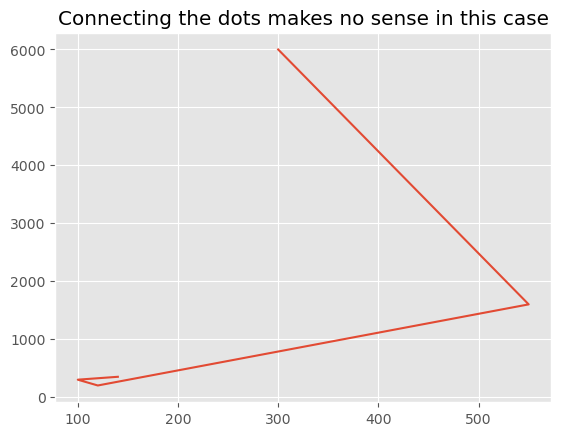

In [23]:
# Extract the data arrays
height = animal_data.column("Height (cm)")
weight = animal_data.column("Weight (kg)")

# Line plot
plt.plot(height, weight)

# Title
plt.title("Connecting the dots makes no sense in this case")

Or you can make a bar chart, which is useful to plot numbers versus a category.

Text(0, 0.5, 'Weight (kg)')

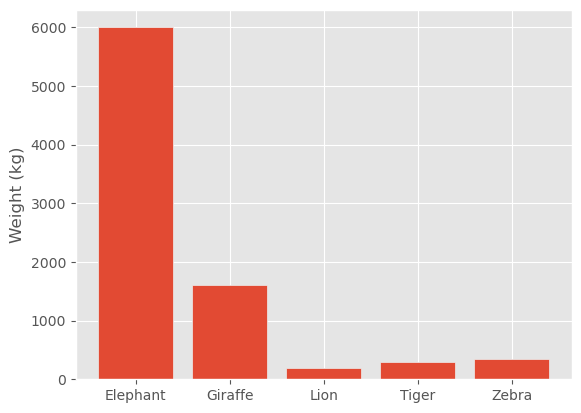

In [24]:
# Extract the arrays
animal = animal_data.column("Animal")
weight = animal_data.column("Weight (kg)")

# Bar chart
plt.bar(animal, weight)

# Label y-axis
plt.ylabel("Weight (kg)")

What if we wanted the bar chart to display the weights in order from lightest to heaviest? Then we would first sort the table before extracting the data columns.

Text(0, 0.5, 'Weight (kg)')

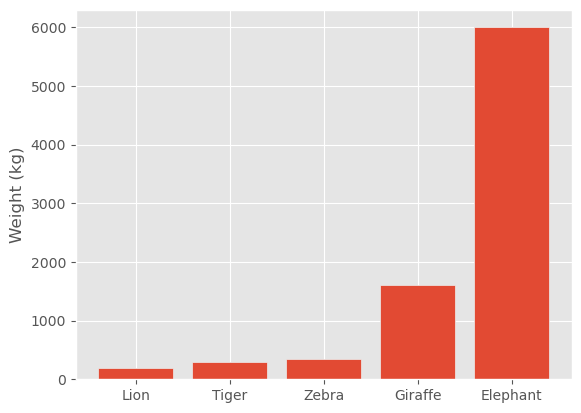

In [25]:
# Sort the data
animals_light2heavy = animal_data.sort("Weight (kg)")

# Extract the arrays
animal = animals_light2heavy.column("Animal")
weight = animals_light2heavy.column("Weight (kg)")

# Bar chart
plt.bar(animal, weight)

# Label y-axis
plt.ylabel("Weight (kg)")

### Table plot commands
Because plotting table data is so common, there are plotting methods built into tables, but you should know that these convience methods are calling matplotlib behind the scenes. 

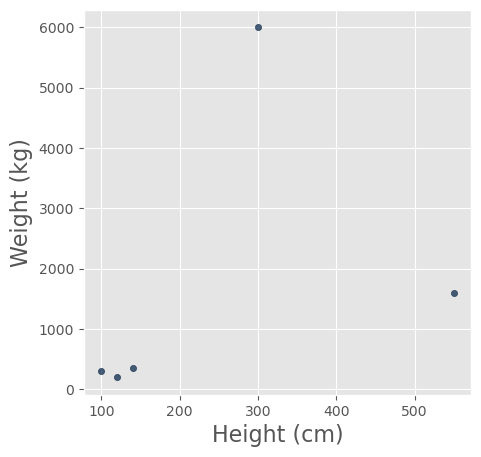

In [26]:
# Using the table scatter() method, you just pass the column names
animal_data.scatter("Height (cm)", "Weight (kg)")

Notice that the `scatter` method for tables was smart enough to use the column labels to label the axes. 

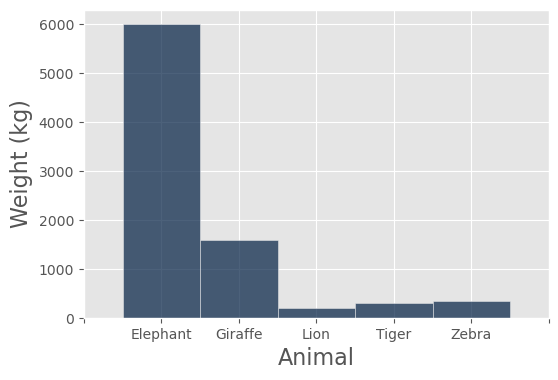

In [27]:
# This also works for bar charts
animal_data.bar("Animal", "Weight (kg)")

**Why not always use the convenience functions built into tables?** In a word -- flexibility. If you are happy with the defaults, you can use the table plotting functions, but somtimes to customize you need work directly with matplotlib. Matplotlib is also a logical choice if your data is not already in a data table.

You will see many examples of both approaches in subsequent labs.

<font color=blue> **Question 4. Make your own plot** </font><br />
Get creative. Make any type of plot you choose using `animal_data`. 

**Note:** There is no automatic check in this case.

## Part 3: Writing Functions

Until now, you have just been using functions, starting way back in Lab01 when you learned to use the `print()` function. Now it is time to graduate from function user to function creator. You will continue to use functions, but you will also write your own! By breaking down complex problems into smaller, well-defined functions, you enhance code readability and make your code easier to understand, debug, and modify.

Functions will seem complicated at first, but they actually follow a simple pattern. We will start with super-simple function and gradually add complexity to imprint this pattern into your Python DNA.

### Function 1: A super simple function. No parameters, no return value.

In [28]:
def print_one_dad_joke():
    print("What did one plant say to the other? Aloe! Long thyme no see.")

- `def` is short for "define." You have to define a function before you can use it
- Then you give the function a name. Function names follow the same rules as Python variables. This function is named `print_one_dad_joke`.
- Right after the function name you put any variables that will be passed to the function inside parenthesis. These are called the function's parameters, or arguments. This function has none, so the parentheses are empty: `()`. We'll come back to this later.
- After the parentheses we put a colon to mark the start of the body of the function. This is where the function does its work.
- All the lines that comprise the body of the function must be indented. When you stop indenting, Python knows you have finished defining your function. This function has only one line, a print statement.

Now that the function has been defined, we can use it.

In [29]:
print_one_dad_joke()

What did one plant say to the other? Aloe! Long thyme no see.


## Function 2: Add a function parameter.

Our super simple function has no flexibility. Everytime you call it, it tells the same joke. (Hmmm. That is rather dad-like...)
Let's add a paramter to the function to allow it to print whatever dad joke we pass it.

In [30]:
def print_any_dad_joke(joke):
    print("Dad joke: ", joke)

In [31]:
dad_joke1 = "I only seem to get sick on weekdays. I must have a weekend immune system"
dad_joke2 = "What brand of underwear do do chemists wear? Kelvin Klein."

print_any_dad_joke(dad_joke1)
print_any_dad_joke(dad_joke2)

Dad joke:  I only seem to get sick on weekdays. I must have a weekend immune system
Dad joke:  What brand of underwear do do chemists wear? Kelvin Klein.


This new function takes one parameter, `joke`, and uses it in a print statement. Notice that the name of the variable you pass the function doesn't matter. Whatever you pass it will be renamed 'joke' inside the function. When we called the function with the statement `print_any_dad_joke(dad_joke1)` the variable `dad_joke1` was passed to the function where it became new variable `joke` that exists only inside the function. If the variable joke is changed inside the function, it doesn't after any of the variables outside of the function.

Let's test this.

In [32]:
def print_any_dad_joke(joke):
    print("Dad joke: ", joke)
    joke = "I hate my job—all I do is crush cans all day. It’s soda pressing."

joke = "How do cows stay up to date? They read the Moo-spaper."
print_any_dad_joke(joke)
print(joke)

Dad joke:  How do cows stay up to date? They read the Moo-spaper.
How do cows stay up to date? They read the Moo-spaper.


In this version of the function, the variable joke was changed inside the function, but not outside of the function, so even after you run the function the variable `joke` contains the first joke. *This is actually very important.*  When you write a function for others to use, you have no idea what variables they might already have in their program; you don't want any variables you define in your function to accidentally change some value in their program. **What is happens in a function stays in a function.**

What if you **want** to get something back from the function? Then you need to add a `return` statement.

### Function 3: Return a value from a function.

Let's write a function that accepts a dad joke (well actually, any string) and returns it in all capital letters.

In [33]:
def capitalize_dad_joke(joke):
    return joke.upper()

In [34]:
dad_joke = "Where do pirates get their hooks? Second hand stores."

joke = capitalize_dad_joke(dad_joke)
print(joke)

WHERE DO PIRATES GET THEIR HOOKS? SECOND HAND STORES.


This function no longer prints the joke, it just return a capitalized verion. 

## Function 4: A function that takes more than one input parameter.
Your function can be designed to accept more than one input parameter. Let's write a function that accepts two, yes two, dad jokes and returns the total number of characters in the two jokes combined.

In [40]:
def total_joke_length(joke1, joke2):
    length_joke1 = len(joke1)
    length_joke2 = len(joke2)
    return length_joke1 + length_joke2

In [41]:
dad_joke1 = "What do you call a beehive without an exit? Unbelievable."
dad_joke2 = "Did you know that the first french fries weren’t cooked in France? They were cooked in Greece."

total_joke_length(dad_joke1, dad_joke2)

151

There are a couple of things to notice here:
- First, as mentioned before, the variables inside the function have the names given in the function definition, not the names passed to the function.
- Second, we used the `return` statement to pass back total number of characters in the two jokes.
- Third, these jokes are killing me!

### Function 4: A function can return more than one value
Just as function can be defined to accept multiple input parameters, functions can return multiple output parameters. Let's modify this last function to return the length of the both jokes rather than the total.

In [42]:
def joke_length(joke1, joke2):
    length_joke1 = len(joke1)
    length_joke2 = len(joke2)
    return length_joke1, length_joke2

In [43]:
dad_joke1 = "If prisoners could take their own mug shots…They’d be called cellfies."
dad_joke2 = "I just broke up with my mathematician girlfriend. She was obsessed with an X."

length1, length2 = joke_length(dad_joke1, dad_joke2)
print("Length of joke 1: ", length1)
print("Length of joke 2: ", length2)

Length of joke 1:  70
Length of joke 2:  77


The function returns two values, so when calling the function you can put two variable on the left of the `=` to receive the return values.

### Function 5: Keyword parameters
Sometimes you want a function that has options. You want to give the user choices in how to use the function without having to write multiple versions of the same function. This can be accomplished using `keyword parameters.` These parameters have default values that will be used if the user doesn't change them.

Let's write a function that takes a dad joke and returns the lenth of the joke, but gives the user the option of also printing the joke, or not.

In [45]:
def joke_length_with_optional_print(joke, print_joke=False):
    if print_joke == True:
        print(joke)
    return len(joke)

In [46]:
dad_joke = "If a pig loses its voice…does it become disgruntled?"
joke_length_with_optional_print(dad_joke)

52

We called the function without supplying the keyword parameter, so it used the default value of `False`, and did not print the joke. (You will learn about `if` statements and other conditionals in the next lab.)

In [47]:
joke_length_with_optional_print(dad_joke, print_joke=True)

If a pig loses its voice…does it become disgruntled?


52

This time we changed the value of the keyword parameter to `True`, so the function printed the joke. You might recognise that you have used keyword parameters before, such as when you used the Table sort method with `descending=True`, which changed the default sort behavior for a table.

**Important point: In Python functions, keyword parameters must come after regular parameters**, so in `joke_length_with_optional_print(joke, print_joke=False):` joke came before print_joke. This is true both when defining and when calling the function.

### Putting it all together
Let us, however reluctantly, leave the world of dad jokes, and write a function that illustrates many of these concepts in mathmatical context.

Write a function that:
- Plots a polynomial $ y = ax^2 + bx + c $
- Input parameters are the coefficients a, b, and c.
- Optional input parameters are the starting x and ending x value (two keyword parameters with default values specified)

In [48]:
def poly_wants_a_nomial(a, b, c, xlo=-10, xhi=10):
    """Plot a polynomial"""
    x = np.arange(xlo, xhi, 0.5)
    y = a * x**2 + b * x + c
    plt.plot(x, y, '-*')
    return y

In [4]:
# Call the function accepting the default values for the keyword parameters
y = poly_wants_a_nomial(2, 10, 3)

NameError: name 'poly_wants_a_nomial' is not defined

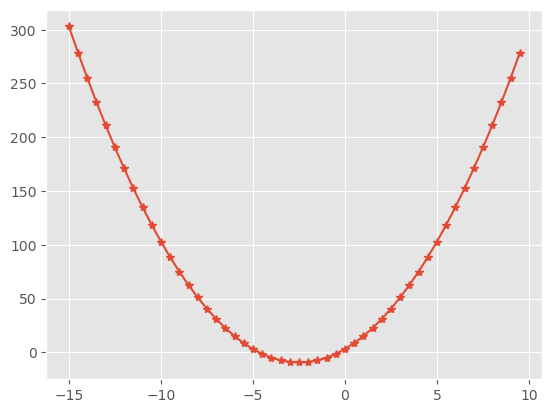

In [50]:
y = poly_wants_a_nomial(2, 10, 3, xlo=-15)

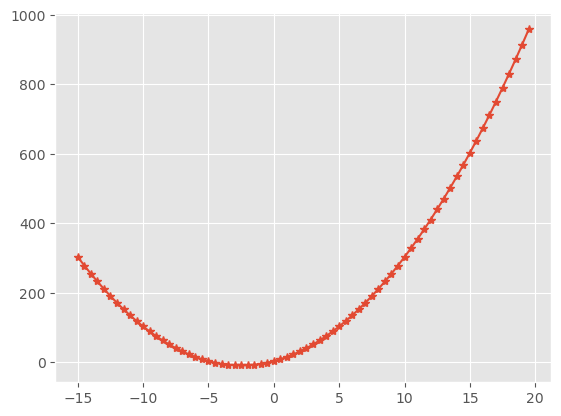

In [51]:
# Call the function overriding the default values for xlo and xhi
y = poly_wants_a_nomial(2, 10, 3, xlo=-15, xhi=20)

### Function Summary

##### `def`
A function definition always starts with `def` (short for **def**ine):

    def

##### Name
Next comes the name of the function.
    
    poly_wants_a_nomial

##### Signature
Next comes something called the *signature* of the function.  This tells Python how many arguments your function should have, and what names you'll use to refer to those arguments in the function's code.  `poly_wants_a_nomial` takes three regualar arguments, the polynomial coefficients, and two keyword arguments, the lower and upper x-axis limits for the plot. 

We put a colon after the signature to tell Python it's over.

    def poly_wants_a_nomial(a, b, c, xlo=-10, xhi=10):

##### Documentation
Functions can do complicated things, so you should write an explanation of what your function does.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing a triple-quoted string:

    def poly_wants_a_nomial(a, b, c, xlo=-10, xhi=10):
        """Plot a polynomial"""
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function.  We can write anything we could write anywhere else. Note that all of the lines of code in the body of the function must be indented by the same amount, typically four spaces. Python knows it has reached the end of the function when the indentation stops.

    def poly_wants_a_nomial(a, b, c, xlo=-10, xhi=10):
        x = np.arange(xlo, xhi, 0.5)
        y = a * x**2 + b * x + c
        plt.plot(x, y, '-*')
        return y

##### `return`
The special instruction `return` in a function's body tells Python to make the value of the function call equal to whatever comes right after `return`. The function will *return* that value to the main body of the code. We want the values of y

    def poly_wants_a_nomial(a, b, c, xlo=-10, xhi=10):
        x = np.arange(xlo, xhi, 0.5)
        y = a * x**2 + b * x + c
        plt.plot(x, y, '-*')
        return y


**Whew!** That was a lot to learn. Now it time to test your knowledge by writing a couple of functions.

<font color=blue> **Question 5. Write a function that returns the sum of two numbers** </font><br />

In [ ]:
def sum_two_numbers(x, y):
    """ Sums x and y """
    return ...

In [3]:
# Test the function yourself before running the check below
...

In [61]:
check('tests/q5.py')

### Converting Celcius to Farenheit
In Celcius, water freezes at 0 degrees and boils at 100.<br>
In Fahrenheit, water freezes at 32 degrees and boils at 212.<br>
Therefore, one degree in Celcius is equal to 1.8 degrees in Fahrenheit: (212 - 32) / (100 - 0).<br>
So to convert temperature in Celcius to Fahrenheit, we multiply by 1.8 and add 32 to adjust the freezing point.

$$ T_F = 1.8 * T_C + 32 $$

For example, normal body temperature in Celcius is around 37, in Farenheit it is 37 * 1.8 + 32 = 98.6

<font color=blue> **Question 6. Write a function that converts from Celcius to Farenheit**</font><br />
Include a docstring describing what the function does. Test your function before running the check.<br>
*Hint:* Your function should have one input parameter and return one output.

In [ ]:
def celcius_to_farenheit(...):
    "..."
    return ...

In [5]:
def celcius_to_farenheit(T):
    "..."
    return T * 1.8 + 32

In [67]:
# Test your function
celcius_to_farenheit(0)

32.0

In [6]:
check('tests/q6.py')

### A cool feature!
Your same function will work if you pass in a single temperature value or an array of temperature values. If you pass in an array of temperatures in Celcius, the function will convert them all and return an array of temperatures in Farenheit.

In [4]:
# Generate temperatures from zero to 100 in steps of one degree
# Recall how np.arange works: np.arange(start, stop, step_size)
# and that np.arange goes up to, but does not include the stop value, hence we use 101

# Generate temperatures from freezing of water to boiling
temperature_C = np.arange(0, 101, 1)
temperature_C

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [7]:
# Call your function passing in an array
temperature_F = celcius_to_farenheit(temperature_C)
temperature_F

array([  32. ,   33.8,   35.6,   37.4,   39.2,   41. ,   42.8,   44.6,
         46.4,   48.2,   50. ,   51.8,   53.6,   55.4,   57.2,   59. ,
         60.8,   62.6,   64.4,   66.2,   68. ,   69.8,   71.6,   73.4,
         75.2,   77. ,   78.8,   80.6,   82.4,   84.2,   86. ,   87.8,
         89.6,   91.4,   93.2,   95. ,   96.8,   98.6,  100.4,  102.2,
        104. ,  105.8,  107.6,  109.4,  111.2,  113. ,  114.8,  116.6,
        118.4,  120.2,  122. ,  123.8,  125.6,  127.4,  129.2,  131. ,
        132.8,  134.6,  136.4,  138.2,  140. ,  141.8,  143.6,  145.4,
        147.2,  149. ,  150.8,  152.6,  154.4,  156.2,  158. ,  159.8,
        161.6,  163.4,  165.2,  167. ,  168.8,  170.6,  172.4,  174.2,
        176. ,  177.8,  179.6,  181.4,  183.2,  185. ,  186.8,  188.6,
        190.4,  192.2,  194. ,  195.8,  197.6,  199.4,  201.2,  203. ,
        204.8,  206.6,  208.4,  210.2,  212. ])

<font color=blue> **Question 7. Plot Farenheit vs Celcius**</font><br />
Create a scatter plot or a line plot with temperature in Celcius on the x-axis and temperature in Farenheit on the y-axis. Label the axes. Use the previous matplotlib examples as guidance.

## Putting it all together
Up to this point in the lab, you have been working with simple data examples. Let's test your knowledge by working with some real scientific data. What better data table than the periodic table of the elements!<br>
Data source: https://gist.github.com/speters33w/e5b1246d6859f29c4f02a299714d4c20#file-periodic-table-of-elements-csv

In [14]:
# Read the table from a CSV file
periodic_table = Table.read_table("data/Periodic Table of Elements.csv")

# Show the first three rows
periodic_table.show(3)

AtomicNumber,Element,Symbol,AtomicMass,NumberOfNeutrons,NumberOfProtons,NumberOfElectrons,Period,Group,Phase,Radioactive,Natural,Metal,Nonmetal,Metalloid,Type,AtomicRadius,Electronegativity,ionizationEnergy,Density,MeltingPoint,BoilingPoint,stableIsotopes,Discoverer,Year,SpecificHeat,NumberOfShells,NumberOfValence
1,Hydrogen,H,1.008,0,1,1,1,1,Gas,nan,yes,nan,yes,nan,Non-Metal,120,2.2,13.5984,9e-05,13.81,20.28,2,Henry Cavendish,1766,14.304,1,1
2,Helium,He,4.003,2,2,2,1,18,Gas,nan,yes,nan,yes,nan,Noble Gas,140,nan,24.5874,0.000179,0.95,4.22,2,Pierre Janssen - Norman Lockyer and Edward Frankland,1868,5.193,1,2
3,Lithium,Li,7,4,3,3,2,1,Solid,nan,yes,yes,nan,nan,Alkali Metal,182,0.98,5.3917,0.534,453.65,1615,2,Johan August Arfvedson - isolated Robert Bunsen and Augu ...,1817,3.582,2,1


In [16]:
# How many rows are in the table?
periodic_table.num_rows

118

In [18]:
# How many columns?
periodic_table.num_columns

28

In [19]:
# What are the column labels?
periodic_table.labels

('AtomicNumber',
 'Element',
 'Symbol',
 'AtomicMass',
 'NumberOfNeutrons',
 'NumberOfProtons',
 'NumberOfElectrons',
 'Period',
 'Group',
 'Phase',
 'Radioactive',
 'Natural',
 'Metal',
 'Nonmetal',
 'Metalloid',
 'Type',
 'AtomicRadius',
 'Electronegativity',
 'ionizationEnergy',
 'Density',
 'MeltingPoint',
 'BoilingPoint',
 'stableIsotopes',
 'Discoverer',
 'Year',
 'SpecificHeat',
 'NumberOfShells',
 'NumberOfValence')

<font color=blue> **Question 8. How many elements have an atomic mass less then 50?**</font><br />
*Hint:* Use the where command to filter the table and num_row to count the rows.

In [ ]:
...
num_light_elements = ...

In [24]:
check('tests/q8.py')

<font color=blue> **Question 9. Which elements were discovered in the 1700's?**</font><br />
*Hint: Look back at the table of where predicates.*

In [39]:
element_1700s = ...

In [38]:
check('tests/q8.py')